In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, InputLayer, Activation
from sklearn import metrics
from tensorflow.keras.callbacks import Callback , ReduceLROnPlateau , ModelCheckpoint, CSVLogger
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
#upload the data into colab
od.download("https://www.kaggle.com/datasets/itamargr/dfdc-faces-of-the-train-sample")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mustafaarahim
Your Kaggle Key: ··········


100%|██████████| 3.64G/3.64G [00:37<00:00, 105MB/s]


In [ ]:
ig = ImageDataGenerator(rescale=1./255.)
train_flow = ig.flow_from_directory(
   '/content/dfdc-faces-of-the-train-sample/train',
    target_size=(160, 160),
    batch_size=100,
    class_mode='categorical',

)

ig1 = ImageDataGenerator(rescale=1./255.)

valid_flow = ig1.flow_from_directory(
   '/content/dfdc-faces-of-the-train-sample/validation',
    target_size=(160, 160),
    batch_size=100,
    class_mode='categorical',

)

test_flow = ig.flow_from_directory(
   '/content/dfdc-faces-of-the-train-sample/validation',
    target_size=(160, 160),
    batch_size=100,
    shuffle = False,
    class_mode='categorical',
)

train_flow.class_indices

Found 93853 images belonging to 2 classes.
Found 30794 images belonging to 2 classes.
Found 30794 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
model = Sequential([
                    InputLayer(input_shape=(160, 160, 3)),
                    Flatten(),
                    Dense(units = 256),
                    BatchNormalization(),
                    Activation('relu'),

                    Dense(units=256),
                    BatchNormalization(),
                    Activation('relu'),

                    Dense(units = 256),
                    BatchNormalization(),
                    Activation('relu'),

                   Dense(units=2, activation = 'softmax')
                   ])




model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )

In [ ]:
model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 76800)             0         
                                                                 
 dense_17 (Dense)            (None, 256)               19661056  
                                                                 
 batch_normalization_13 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_14 (Ba  (None, 256)               1024      
 tchNormalization)                                    

In [ ]:
checkpoint = ModelCheckpoint(filepath='model.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=1,
                              verbose=1,
                              min_delta=0.0001
                             )
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [ ]:
history = model.fit(train_flow,
    epochs = 5,
    validation_data =valid_flow,
    callbacks=callbacks
)

Epoch 1/5
939/939 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.8800
Epoch 1: val_loss improved from inf to 0.68917, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


939/939 [==============================] - 190s 199ms/step - loss: 0.2833 - accuracy: 0.8800 - val_loss: 0.6892 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 2/5
939/939 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9328
Epoch 2: val_loss did not improve from 0.68917

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
939/939 [==============================] - 188s 200ms/step - loss: 0.1676 - accuracy: 0.9328 - val_loss: 0.7136 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 3/5
939/939 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9614
Epoch 3: val_loss did not improve from 0.68917

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
939/939 [==============================] - 184s 196ms/step - loss: 0.0942 - accuracy: 0.9614 - val_loss: 0.8219 - val_accuracy: 0.7865 - lr: 2.0000e-04
Epoch 4/5
939/939 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9687
Epoch 4: val_loss

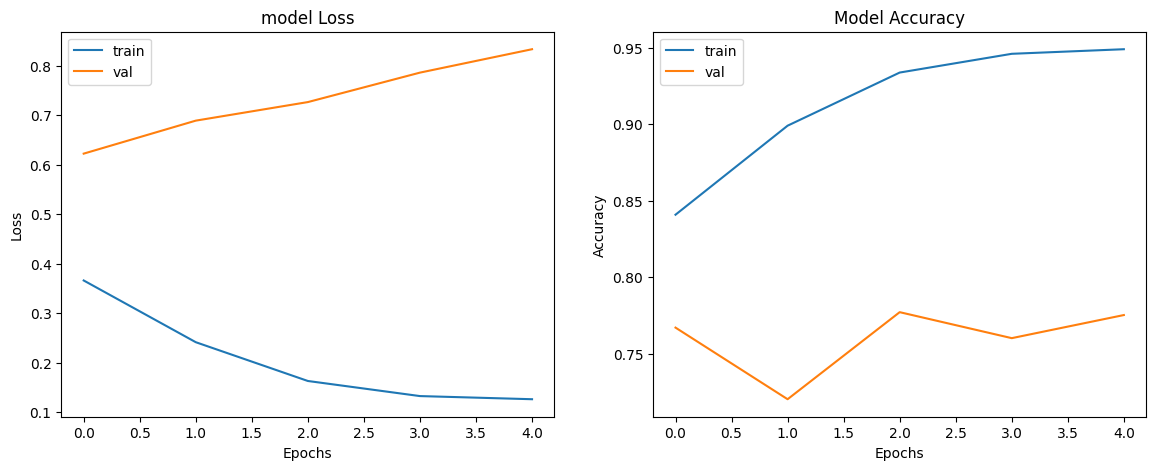

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
y_pred = model.predict(test_flow)

y_test = test_flow.classes

308/308 [==============================] - 46s 147ms/step


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
confusion_matrix=confusion_matrix(y_test, y_pred_labels)
confusion_matrix

array([[21524,  3241],
       [ 3676,  2353]])

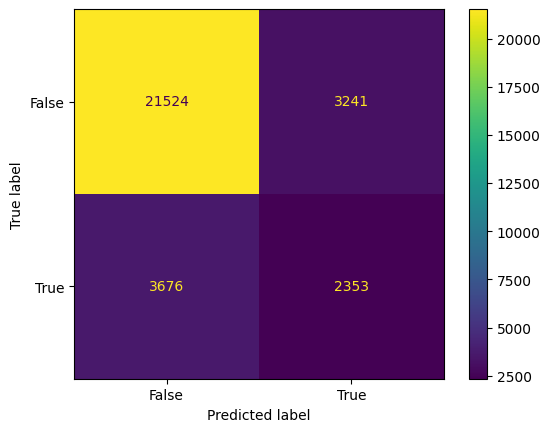

In [ ]:
Fake=False
Real=True
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [Fake, Real])

cm_display.plot()
plt.show()

In [ ]:
_, accu = model.evaluate(test_flow)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

308/308 [==============================] - 47s 152ms/step - loss: 0.8337 - accuracy: 0.7754
Final Test Acccuracy = 77.538


In [ ]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred_labels))
print("AP Score:", metrics.average_precision_score(y_test, y_pred_labels))
print()
print(metrics.classification_report(y_test, y_pred_labels))

ROC AUC Score: 0.629705066068548
AP Score: 0.28353721715117586

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     24765
           1       0.42      0.39      0.40      6029

    accuracy                           0.78     30794
   macro avg       0.64      0.63      0.63     30794
weighted avg       0.77      0.78      0.77     30794



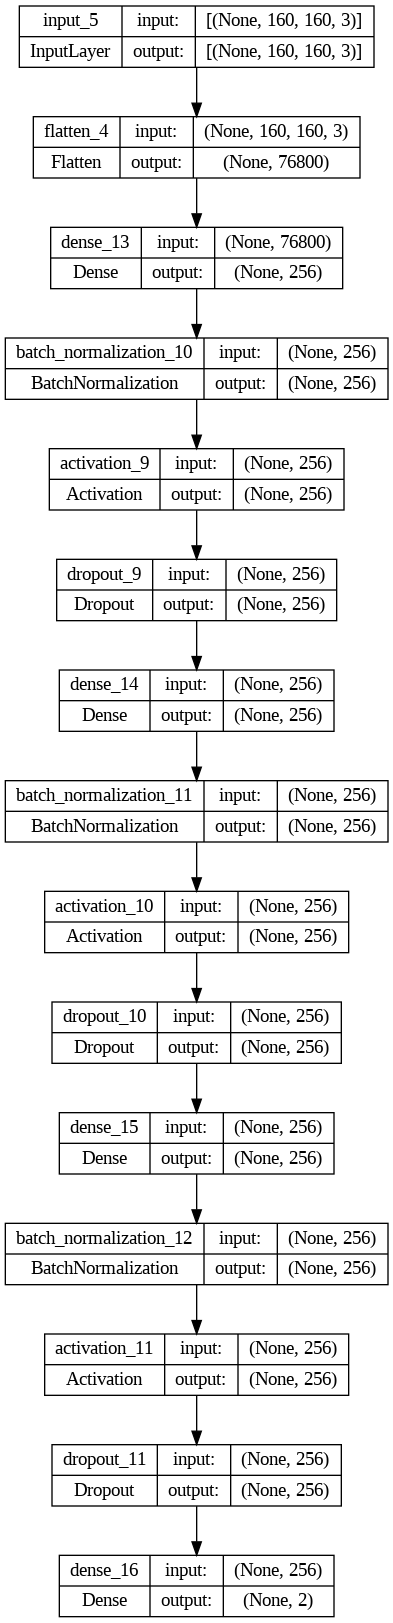

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)